In [55]:
%matplotlib notebook
from astropy.io import fits
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from matplotlib import animation, rc
from IPython.display import HTML
from astropy import units as u

Traceback (most recent call last):
  File "/home/lmberkhout/anaconda3/envs/HERA2/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/lmberkhout/anaconda3/envs/HERA2/lib/python3.6/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [56]:
def corner_rms(image):
    return np.std(image[:100,:100])

color_calib = fits.open('/data6/HERA/HERA_imaging/IDR2/IDR2-1_run_3.1/imgs/zen.grp1.of1.xx.LST.28211.uvOCRSL.uvfits.msFinal.combined.img.fits')[0]
d = color_calib.data.squeeze()*0.01
print(np.min(d),np.max(d))

-0.018341526 0.14630409


In [57]:
files = np.sort(glob('/data6/HERA/HERA_imaging/2458042/run_lmb2/imgs/*.fits'))
HDUS = []
for f in files:
    HDUS.append(fits.open(f)[0])
print(HDUS[0].data.shape)

(1, 1, 512, 512)


<IPython.core.display.Javascript object>


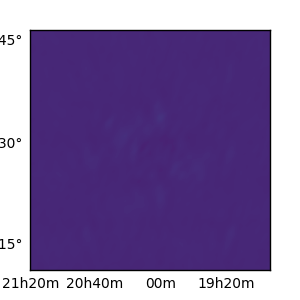

In [58]:
fig = plt.figure(figsize=(3,3))
wcs = WCS(HDUS[1].header).celestial
ax = WCSAxes(fig, [0.1, 0.1, 0.8, 0.8], wcs=wcs)
fig.add_axes(ax)
data = HDUS[0].data.squeeze()
img = ax.imshow(data,vmin=d.min(),vmax=np.max(d))
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter('hh:mm')
lon.set_ticks(spacing=10 * u.degree, color='white', exclude_overlapping=True)
lat.set_ticks(spacing=15 * u.degree, color='white', exclude_overlapping=True)
#plt.xlabel('RA')
#plt.ylabel('Dec')

In [59]:
def init():
    img.set_data(np.zeros((1024,1024)))
    return 

def animate(i):
    hdu = HDUS[i]
    data = hdu.data.squeeze()
    wcs = WCS(hdu.header).celestial
    ax.reset_wcs(wcs=wcs)
    img.set_data(data)
    lon = ax.coords[0]
    lat = ax.coords[1]
    lon.set_major_formatter('hh:mm')
    lon.set_ticks(spacing=10 * u.degree, color='white', exclude_overlapping=True)
    lat.set_ticks(spacing=15 * u.degree, color='white', exclude_overlapping=True)
    #plt.xlabel('RA')
    #plt.ylabel('Dec')
    return 

In [60]:
anim = animation.FuncAnimation(fig, animate, init_func=init,                        
                               frames=len(HDUS), interval=100, blit=True)

dpi=300
writer = animation.writers['ffmpeg'](fps=10)
anim.save('corrected_run_IDR2_uvOCRSDL_spw_100_800.mp4',writer=writer,dpi=dpi)


In [61]:
HTML(anim.to_html5_video())